## Day 78 Lecture 2 Assignment

In this assignment, we will learn about other optimization algorithms. We will create a neural network and try out the different optimization algorithms and compare their performance.

In [1]:
import numpy as np
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense

In this assignment, we will be using the cancer data that we have worked with in previous lessons. The pre-processed data is loaded below.

In [2]:
cancer = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/cancer_processed.csv')

In [3]:
cancer.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,M


As you may recall, diagnosis is the target variable. One hot encode the diagnosis column.

In [5]:
# Answer below:
cancer = pd.get_dummies(cancer, columns=["diagnosis"], drop_first=True)
cancer.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis_M
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,1


In [10]:
cancer.isnull().mean()

radius_mean               0.0
texture_mean              0.0
perimeter_mean            0.0
area_mean                 0.0
smoothness_mean           0.0
compactness_mean          0.0
concavity_mean            0.0
concave points_mean       0.0
symmetry_mean             0.0
fractal_dimension_mean    0.0
diagnosis_M               0.0
dtype: float64

Split the data into train and test with 20% of the data in test.

In [6]:
# Answer below
from sklearn.model_selection import train_test_split as tts

x = cancer.drop(columns=["diagnosis_M"])
y = cancer.diagnosis_M

X_train, X_test, y_train, y_test = tts(x, y, test_size=0.2)

Scale all other variables using the standard scaler.

In [7]:
# Answer below:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_ = scaler.fit_transform(X_train)
X_test_ = scaler.transform(X_test)

In [9]:
X_train_

array([[-0.7920755 ,  3.38089176, -0.83827145, ..., -1.07526553,
         0.10654909, -0.64903418],
       [-0.00646562, -0.77532424, -0.07162208, ..., -0.49304156,
        -0.36015127, -0.55230755],
       [ 0.11611181,  0.50207698,  0.10883725, ...,  0.01158966,
         0.92594666, -0.91434151],
       ...,
       [-0.39369886, -0.26482995, -0.357854  , ...,  0.04600784,
        -0.62022093,  0.76870187],
       [ 0.093825  ,  1.79113331,  0.02809482, ..., -0.79850289,
        -0.38508945, -1.19484874],
       [ 0.14397031,  0.51839415,  0.23641028, ...,  0.9846624 ,
         1.55652653,  0.86542851]])

Generate a sequential model consisting of 5 layers. The layers should be of size 128, 64, 32, 32, 1. Use the appropriate activation for the output layer based on the type of prediction algorithm we are producing.

In [22]:
# Answer below
def build_model(opt, loss):
    model = Sequential()
    model.add(Dense(128, activation="relu", input_dim=X_train_.shape[1]))
    model.add(Dense(64, activation="relu"))
    model.add(Dense(32, activation="relu"))
    model.add(Dense(32, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(loss=loss, optimizer=opt, metrics=['msle', 'accuracy'])
    return model

Initialize a SGD optimizer with learning rate 0.05 and momentum 0.9.

In [13]:
# Answer below:
from tensorflow.keras.optimizers import SGD

sgd = SGD(learning_rate=0.05, momentum=0.9)

Compile and fit the model using the appropriate loss function and metric and use the optimizers defined above.

batch size = 100, epochs = 200

In [43]:
import time

In [44]:
# Answer below:
start = time.time()
model_1 = build_model(opt=sgd, loss="mse")
m1_hist = model_1.fit(X_train_, y_train, epochs=200, batch_size=100, 
          verbose=1, validation_data=(X_test_, y_test))
m1_time = time.time() - start

Epoch 1/200
5/5 [==============================] - 1s 55ms/step - loss: 0.2572 - msle: 0.1375 - accuracy: 0.3593 - val_loss: 0.2355 - val_msle: 0.1252 - val_accuracy: 0.7807
Epoch 2/200
5/5 [==============================] - 0s 13ms/step - loss: 0.2268 - msle: 0.1210 - accuracy: 0.8136 - val_loss: 0.2027 - val_msle: 0.1059 - val_accuracy: 0.7982
Epoch 3/200
5/5 [==============================] - 0s 14ms/step - loss: 0.1886 - msle: 0.0999 - accuracy: 0.8279 - val_loss: 0.1596 - val_msle: 0.0810 - val_accuracy: 0.8421
Epoch 4/200
5/5 [==============================] - 0s 14ms/step - loss: 0.1395 - msle: 0.0711 - accuracy: 0.8820 - val_loss: 0.1046 - val_msle: 0.0526 - val_accuracy: 0.9123
Epoch 5/200
5/5 [==============================] - 0s 53ms/step - loss: 0.0877 - msle: 0.0441 - accuracy: 0.9417 - val_loss: 0.0670 - val_msle: 0.0341 - val_accuracy: 0.9211
Epoch 6/200
5/5 [==============================] - 0s 12ms/step - loss: 0.0550 - msle: 0.0280 - accuracy: 0.9364 - val_loss: 0.055

Define the RMSprop optimizer with a learning rate of 0.05.

In [21]:
# Answer below:
from tensorflow.keras.optimizers import RMSprop

rmsprop = RMSprop(learning_rate=0.05)

Compile and fit the model using the optimizer defined above. What do you notice about the accuracy?

In [46]:
# Answer below:
start = time.time()
model_2 = build_model(opt=rmsprop, loss="mse")
m2_hist = model_2.fit(X_train_, y_train, epochs=200, batch_size=100, 
          verbose=1, validation_data=(X_test_, y_test))
m2_time = time.time() - start

Epoch 1/200
5/5 [==============================] - 1s 54ms/step - loss: 0.3126 - msle: 0.1573 - accuracy: 0.5730 - val_loss: 0.3860 - val_msle: 0.1854 - val_accuracy: 0.6140
Epoch 2/200
5/5 [==============================] - 0s 11ms/step - loss: 0.3621 - msle: 0.1740 - accuracy: 0.6379 - val_loss: 0.3860 - val_msle: 0.1854 - val_accuracy: 0.6140
Epoch 3/200
5/5 [==============================] - 0s 14ms/step - loss: 0.3842 - msle: 0.1846 - accuracy: 0.6158 - val_loss: 0.3860 - val_msle: 0.1854 - val_accuracy: 0.6140
Epoch 4/200
5/5 [==============================] - 0s 16ms/step - loss: 0.3420 - msle: 0.1643 - accuracy: 0.6580 - val_loss: 0.3860 - val_msle: 0.1854 - val_accuracy: 0.6140
Epoch 5/200
5/5 [==============================] - 0s 13ms/step - loss: 0.3693 - msle: 0.1774 - accuracy: 0.6307 - val_loss: 0.3860 - val_msle: 0.1854 - val_accuracy: 0.6140
Epoch 6/200
5/5 [==============================] - 0s 11ms/step - loss: 0.3410 - msle: 0.1638 - accuracy: 0.6590 - val_loss: 0.386

The accuracy with RMSProp is significantly worse than SGD's at the same learning rate due to the exponential decay of learning rate as opposed to SGD with momentum that allows for faster optimization.

Define the Adam optimizer with learning rate 0.01

Compile and fit the model using the optimizer defined above. How does the peformance differ with this optimizer?

In [47]:
# Answer below:
from tensorflow.keras.optimizers import Adam

start = time.time()
adam = Adam(learning_rate=0.01)
model_3 = build_model(opt=adam, loss="mse")
m3_hist = model_3.fit(X_train_, y_train, epochs=200, batch_size=100,
            verbose=1, validation_data=(X_test_, y_test))
m3_time = time.time() - start

Epoch 1/200
5/5 [==============================] - 1s 54ms/step - loss: 0.1842 - msle: 0.0977 - accuracy: 0.7579 - val_loss: 0.0568 - val_msle: 0.0270 - val_accuracy: 0.9298
Epoch 2/200
5/5 [==============================] - 0s 13ms/step - loss: 0.0515 - msle: 0.0244 - accuracy: 0.9267 - val_loss: 0.0469 - val_msle: 0.0217 - val_accuracy: 0.9298
Epoch 3/200
5/5 [==============================] - 0s 12ms/step - loss: 0.0391 - msle: 0.0189 - accuracy: 0.9532 - val_loss: 0.0597 - val_msle: 0.0273 - val_accuracy: 0.9211
Epoch 4/200
5/5 [==============================] - 0s 12ms/step - loss: 0.0353 - msle: 0.0170 - accuracy: 0.9605 - val_loss: 0.0461 - val_msle: 0.0211 - val_accuracy: 0.9386
Epoch 5/200
5/5 [==============================] - 0s 13ms/step - loss: 0.0321 - msle: 0.0148 - accuracy: 0.9557 - val_loss: 0.0403 - val_msle: 0.0194 - val_accuracy: 0.9561
Epoch 6/200
5/5 [==============================] - 0s 12ms/step - loss: 0.0438 - msle: 0.0218 - accuracy: 0.9482 - val_loss: 0.051

Adam w/ LR=0.01 did better than RMSProp w/ LR=0.05. It performed close to SGD w/LR=0.05 & M=0.9.

Now change the learning rate to 0.1 in your Adam optimizer and compare the results (both speed and accuracy).

In [48]:
# Answer below:
start = time.time()
adam = Adam(0.1)
model_4 = build_model(opt=adam, loss="mse")
m4_hist = model_4.fit(X_train_, y_train, epochs=200, batch_size=100,
            verbose=1, validation_data=(X_test_, y_test))
m4_time = time.time() - start

Epoch 1/200
5/5 [==============================] - 1s 55ms/step - loss: 0.2192 - msle: 0.1104 - accuracy: 0.7390 - val_loss: 0.0702 - val_msle: 0.0337 - val_accuracy: 0.9298
Epoch 2/200
5/5 [==============================] - 0s 14ms/step - loss: 0.2493 - msle: 0.1198 - accuracy: 0.7506 - val_loss: 0.3860 - val_msle: 0.1854 - val_accuracy: 0.6140
Epoch 3/200
5/5 [==============================] - 0s 13ms/step - loss: 0.3606 - msle: 0.1732 - accuracy: 0.6394 - val_loss: 0.3860 - val_msle: 0.1854 - val_accuracy: 0.6140
Epoch 4/200
5/5 [==============================] - 0s 14ms/step - loss: 0.3738 - msle: 0.1796 - accuracy: 0.6262 - val_loss: 0.3860 - val_msle: 0.1854 - val_accuracy: 0.6140
Epoch 5/200
5/5 [==============================] - 0s 13ms/step - loss: 0.3631 - msle: 0.1744 - accuracy: 0.6369 - val_loss: 0.3860 - val_msle: 0.1854 - val_accuracy: 0.6140
Epoch 6/200
5/5 [==============================] - 0s 15ms/step - loss: 0.3463 - msle: 0.1664 - accuracy: 0.6537 - val_loss: 0.386

In [35]:
pd.DataFrame(m1_hist.history)

,loss,msle,accuracy,val_loss,val_msle,val_accuracy
0,0.246292,0.131009,0.665934,0.231629,0.122619,0.771930
1,0.212634,0.114468,0.887912,0.187915,0.100635,0.894737
2,0.163784,0.089048,0.927473,0.131158,0.070602,0.912281
3,0.106132,0.057481,0.940659,0.080544,0.043411,0.912281
4,0.065268,0.034131,0.940659,0.060520,0.031073,0.938596
...,...,...,...,...,...,...
195,0.004619,0.002238,0.995604,0.042195,0.021365,0.938596
196,0.004612,0.002239,0.995604,0.042903,0.021684,0.938596
197,0.004603,0.002242,0.995604,0.042636,0.021576,0.938596
198,0.004598,0.002235,0.995604,0.042610,0.021572,0.938596


In [69]:
d = {"SGD_accuracy" : m1_hist.history["accuracy"],
     "RMSProp_accuracy" : m2_hist.history["accuracy"],
     "Adam0.01_accuracy" : m3_hist.history["accuracy"],
     "Adam0.1_accuracy" : m4_hist.history["accuracy"]}
results = pd.DataFrame(
    data=d)

In [66]:
results.tail()

,SGD_accuracy,RMSProp_accuracy,Adam0.01_accuracy,Adam0.1_accuracy
195,0.995604,0.630769,0.991209,0.630769
196,0.995604,0.630769,0.991209,0.630769
197,0.995604,0.630769,0.991209,0.630769
198,0.995604,0.630769,0.991209,0.630769
199,0.995604,0.630769,0.993407,0.630769


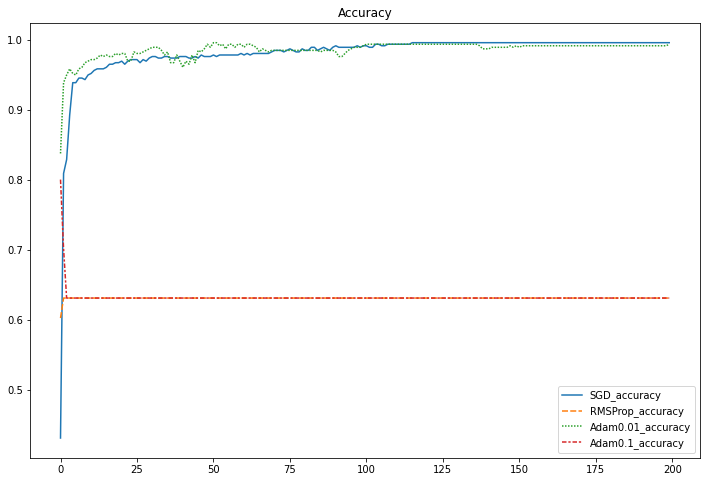

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.title("Accuracy")
sns.lineplot(data=results)
plt.show()

In [79]:
runtime = pd.DataFrame(index=["SGD", "RMSProp", "Adam0.01", "Adam0.1"],
                       data={"runtime" : [m1_time, m2_time, m3_time, m4_time]})
runtime.head()

,runtime
SGD,13.589209
RMSProp,13.921492
Adam0.01,14.046503
Adam0.1,13.907092


The runtimes of the four models are not too different. Noticeably, SGD is the fastest while also giving the best accuracy. For this classification task, SGD performs the best with the least runtime needed to get to 200 epochs.

In [86]:
results.loc[50]

SGD_accuracy         0.978022
RMSProp_accuracy     0.630769
Adam0.01_accuracy    0.995604
Adam0.1_accuracy     0.630769
Name: 50, dtype: float64

However, if say, we were to look at earlier epochs well before 200, SGD doesn't come out as the best. At 50 epoch, Adam with a 0.01 LR actually achieves the accuracy SGD converges to later 150 more epochs down the line.